## Pair Programing 
# Estadística Descriptiva 

Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado.

- Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

- Instrucciones:

    - Calcula las siguientes estadísticas descriptivas para las variables numéricas:

        - Media

        - Mediana

        - Desviación estándar

        - Mínimo

        - Máximo

    - Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

    - Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

    - Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

    - Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col=0)

df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


- Calcula las siguientes estadísticas descriptivas para las variables numéricas:

    - Media

    - Mediana

    - Desviación estándar

    - Mínimo

    - Máximo

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.0,1.345045e+02,1.573068e+02,1.265000e+00,2.616850e+01,8.300000e+01,1.655000e+02,8.470000e+02
agricultural_land,188.0,3.911755e+01,2.178305e+01,6.000000e-01,2.170000e+01,3.960000e+01,5.537500e+01,8.260000e+01
land_area,165.0,2.552127e+02,2.583850e+02,0.000000e+00,4.127700e+01,1.484600e+02,4.300000e+02,9.640000e+02
armed_forces_size,166.0,1.037831e+02,1.671580e+02,0.000000e+00,1.025000e+01,2.850000e+01,1.282500e+02,9.360000e+02
birth_rate,189.0,2.021497e+01,9.945774e+00,5.900000e+00,1.130000e+01,1.795000e+01,2.875000e+01,4.608000e+01
calling_code,194.0,3.605464e+02,3.232364e+02,1.000000e+00,8.250000e+01,2.555000e+02,5.067500e+02,1.876000e+03
co2-emissions,183.0,1.259155e+02,1.817949e+02,1.016000e+00,7.600000e+00,3.447700e+01,1.850305e+02,7.279730e+02
cpi,175.0,1.441936e+02,5.478400e+01,9.903000e+01,1.136700e+02,1.247400e+02,1.559250e+02,5.509300e+02
cpi_change,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
fertility_rate,188.0,2.698138e+00,1.282267e+00,9.800000e-01,1.705000e+00,2.245000e+00,3.597500e+00,6.910000e+00


- Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.


In [15]:
df_pais = df.groupby("country")["density"].max()
df_pais

country
Afghanistan     60.0
Albania        105.0
Algeria         18.0
Andorra        164.0
Angola          26.0
               ...  
Venezuela       32.0
Vietnam        314.0
Yemen           56.0
Zambia          25.0
Zimbabwe        38.0
Name: density, Length: 195, dtype: float64

In [16]:
df[["country", "density"]].max()

country    Zimbabwe
density       847.0
dtype: object

In [17]:
df[["country", "population"]].min()

country       Afghanistan
population         10.084
dtype: object

- Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.


In [25]:
df.groupby("country")["birth_rate"].mean().reset_index().sort_values(by="birth_rate", ascending=False)

,country,birth_rate
121,Niger,46.08
32,Chad,42.17
157,Somalia,41.75
102,Mali,41.54
42,Democratic Republic of the Congo,41.18
...,...,...
116,Nauru,NaN
124,North Macedonia,NaN
129,Palestinian National Authority,NaN
180,Tuvalu,NaN


  - Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [31]:
df["infant_mortality_2"] = pd.cut(df["infant_mortality"], bins= 3, labels= ["baja", "moderada", "alta"])
df[["country", "infant_mortality", "infant_mortality_2"]].sort_values(by="infant_mortality", ascending=False)

,country,infant_mortality,infant_mortality_2
33,Central African Republic,84.5,alta
155,Sierra Leone,78.5,alta
160,Somalia,76.6,alta
126,Nigeria,75.7,alta
34,Chad,71.4,alta
...,...,...,...
73,Vatican City,NaN,NaN
98,Liechtenstein,NaN,NaN
120,Nauru,NaN,NaN
128,North Macedonia,NaN,NaN


- Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [33]:
df_corr = df[["fertility_rate", "life_expectancy"]].corr(method="spearman")
df_corr

,fertility_rate,life_expectancy
fertility_rate,1.000000,-0.843047
life_expectancy,-0.843047,1.000000


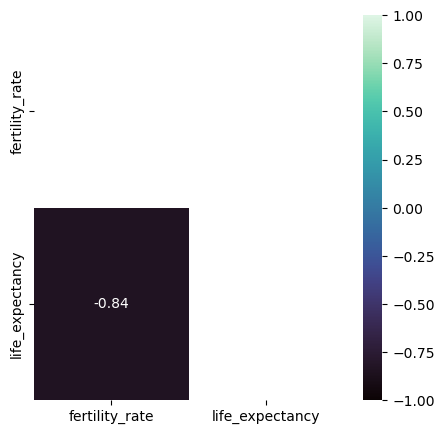

In [37]:
plt.figure(figsize = (5, 5))

mask = np.triu(np.ones_like(df_corr, dtype=bool))


# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_corr, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1,
            mask =mask); # para identificar el valor mínimo de nuestra escala de colores

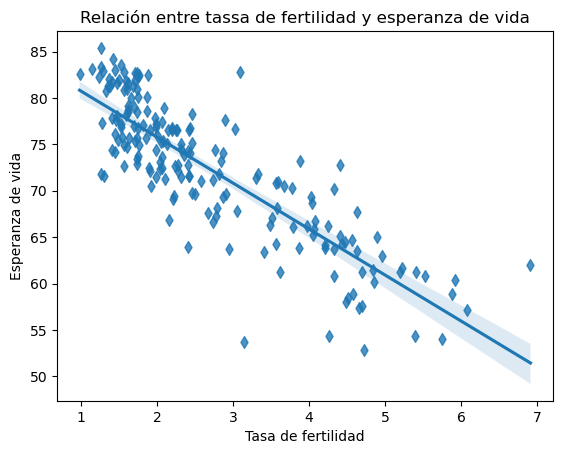

In [39]:
sns.regplot(x = "fertility_rate", 
            y = "life_expectancy", 
            data = df, 
            marker = "d")

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Tasa de fertilidad")
plt.ylabel("Esperanza de vida")

# ponemos título a la gráfica
plt.title("Relación entre tassa de fertilidad y esperanza de vida");

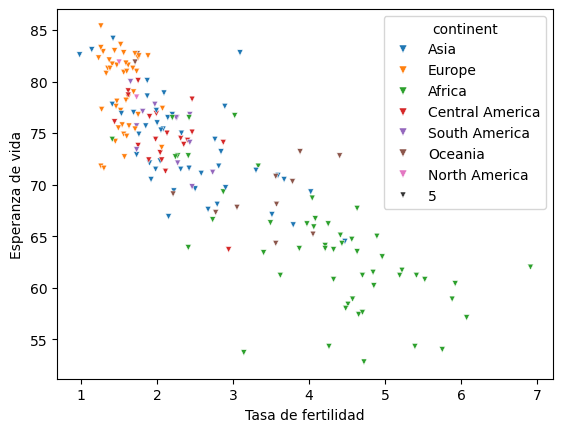

In [40]:
sns.scatterplot(x = "fertility_rate", 
                y = "life_expectancy", 
                data = df, 
                size = 5, 
                marker= "v", 
                color = "orange",
                hue= "continent")


# cambiamos los nombres de los ejes
plt.xlabel("Tasa de fertilidad")
plt.ylabel("Esperanza de vida");


- Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

- Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

- Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

- Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

Recuerda proporcionar interpretaciones y conclusiones basadas en los resultados obtenidos en cada paso.

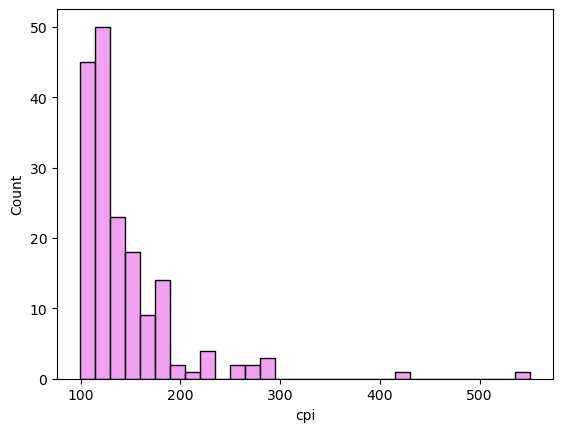

In [41]:
sns.histplot(x = "cpi", data = df, color = "violet");

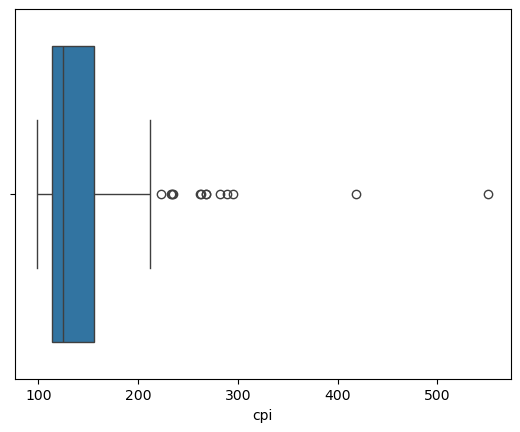

In [44]:
sns.boxplot(x="cpi", data= df);

- Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).


In [53]:
df["diferencia"] = df["gdp"]- df["co2-emissions"]

df_diferencia =df[["country", "gdp", "co2-emissions", "diferencia"]].sort_values(by="diferencia", ascending=False).head(10)

In [55]:
df_diferencia

,country,gdp,co2-emissions,diferencia
64,Germany,3.845630e+12,727.973,3.845630e+12
185,United Kingdom,2.827113e+12,379.025,2.827113e+12
60,France,2.715518e+12,303.276,2.715518e+12
162,South Korea,2.029000e+12,620.302,2.029000e+12
83,Italy,2.001244e+12,320.411,2.001244e+12
23,Brazil,1.839758e+12,462.299,1.839758e+12
32,Canada,1.736426e+12,544.894,1.736426e+12
164,Spain,1.394116e+12,244.002,1.394116e+12
8,Australia,1.392681e+12,375.908,1.392681e+12
110,Mexico,1.258287e+12,486.406,1.258287e+12


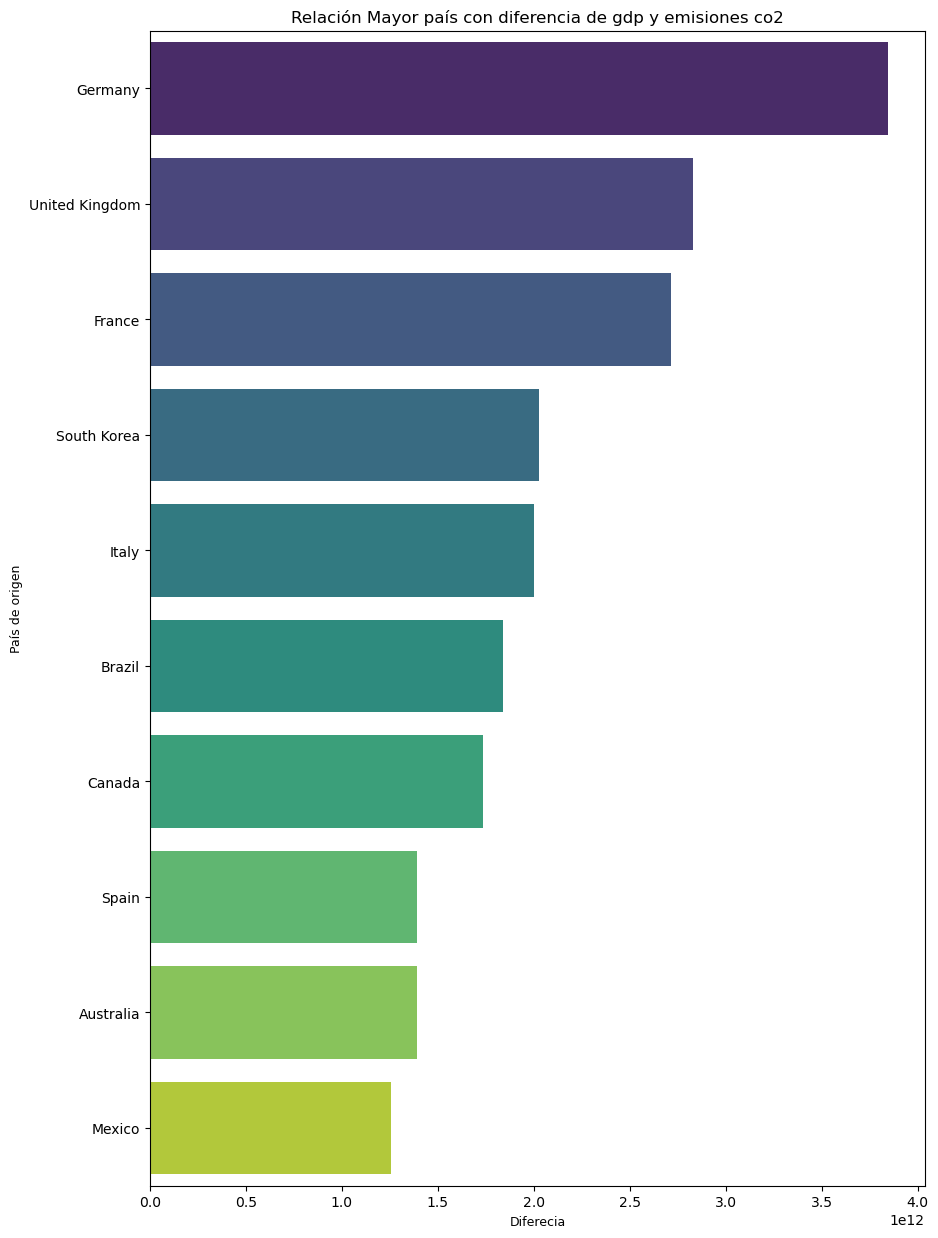

In [57]:
plt.figure(figsize=(10, 15))
sns.barplot(x="diferencia",
            y="country",
            data=df_diferencia,
            palette="viridis")
plt.title("Relación Mayor país con diferencia de gdp y emisiones co2", fontsize=12)
plt.xlabel("Diferecia", fontsize=9)
plt.ylabel("País de origen", fontsize=9)  
plt.show()

- Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.


In [68]:
df_fuerza_laboral = df.groupby("country")["population_labor_force_participation"].mean().dropna().reset_index().head(10)

In [69]:
df_fuerza_laboral

,country,population_labor_force_participation
0,Afghanistan,48.9
1,Albania,55.7
2,Algeria,41.2
3,Angola,77.5
4,Argentina,61.3
5,Armenia,55.6
6,Australia,65.5
7,Austria,60.7
8,Azerbaijan,66.5
9,Bahrain,73.4


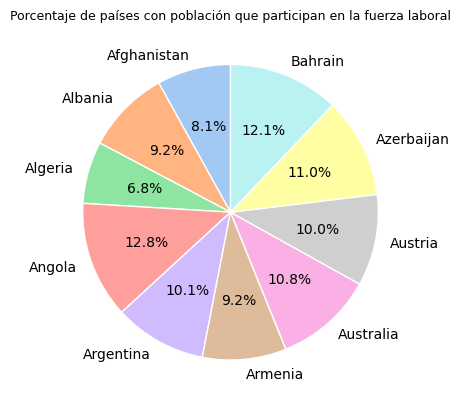

In [72]:
colores = sns.color_palette("pastel") # paleta de colores de seaborn
plt.pie("population_labor_force_participation", labels= "country",
        data = df_fuerza_laboral, 
        autopct= '%1.1f%%',
        colors = colores, 
        textprops={'fontsize': 10}, 
        startangle=90,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }) # mejora en los bordes
plt.title("Porcentaje de países con población que participan en la fuerza laboral", fontsize=9) # mejora en el titulo
plt.show()

- Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.


In [75]:
df_numeric = df.select_dtypes(include=['number'])


In [76]:


df_corr_3 = df_numeric.corr(method="spearman")
df_corr_3

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,diferencia
density,1.000000,0.200302,-0.220539,0.125936,-0.176731,-0.109384,0.209351,-0.119915,-0.138960,-0.176856,-0.015206,0.104546,-0.004021,0.033382,-0.012201,-0.095937,0.135093,-0.098955,0.061765,0.014885,0.026946,-0.511743,-0.090923,0.094292,0.023721,-0.152447,-0.359084,0.116068,0.021248,0.006759
agricultural_land,0.200302,1.000000,0.022158,0.173127,0.173660,-0.036252,0.015142,0.249278,0.232981,0.164436,-0.382159,0.031457,0.078430,-0.060903,-0.132087,0.200319,-0.221712,0.146761,-0.191189,0.111157,-0.080401,-0.140550,-0.150819,-0.072350,0.159252,0.055847,-0.025796,0.004682,-0.012907,0.075940
land_area,-0.220539,0.022158,1.000000,0.384287,0.178757,-0.242378,0.166552,0.136854,0.224723,0.175796,-0.008680,-0.089567,0.171319,0.022693,-0.071133,0.222185,-0.176727,0.179866,-0.097304,0.112200,-0.210800,-0.398381,0.033388,-0.209875,0.162818,0.005533,-0.485771,-0.158250,0.047216,0.129286
armed_forces_size,0.125936,0.173127,0.384287,1.000000,-0.118602,-0.241026,0.477055,0.094123,0.084370,-0.095454,-0.153847,-0.197941,0.696120,-0.000946,0.255177,-0.104961,0.162024,-0.130828,0.097284,0.259397,0.120254,0.806751,-0.121036,-0.234878,0.162857,-0.090453,0.476780,0.123754,0.234507,0.692158
birth_rate,-0.176731,0.173660,0.178757,-0.118602,1.000000,0.164103,-0.246307,0.391884,0.237546,0.980987,-0.084387,-0.302687,-0.416506,0.064180,-0.787452,0.895507,-0.859974,0.856945,-0.657015,0.245818,-0.845314,0.349382,0.213206,-0.397999,0.168458,-0.055770,0.106992,-0.596338,0.040054,-0.431593
calling_code,-0.109384,-0.036252,-0.242378,-0.241026,0.164103,1.000000,-0.265872,0.105980,-0.016856,0.164907,-0.085191,-0.143463,-0.356442,-0.068676,-0.227563,0.106171,-0.154025,0.051555,-0.151760,-0.054249,-0.074278,0.047469,0.084262,0.005102,-0.334636,-0.091476,-0.163097,-0.043635,0.304064,-0.315823
co2-emissions,0.209351,0.015142,0.166552,0.477055,-0.246307,-0.265872,1.000000,-0.142751,-0.131654,-0.205801,0.003200,0.031760,0.300473,0.080741,0.266869,-0.254783,0.261146,-0.292307,0.378285,-0.180222,0.192914,-0.345963,-0.148427,0.023486,0.065845,-0.002232,-0.349605,0.136520,0.060003,0.300473
cpi,-0.119915,0.249278,0.136854,0.094123,0.391884,0.105980,-0.142751,1.000000,0.804287,0.359507,-0.091008,-0.325114,0.008686,0.149329,-0.291723,0.419904,-0.422903,0.415222,-0.475015,0.185645,-0.293830,0.219941,0.039076,-0.320285,0.092007,0.023119,0.265291,-0.261395,0.164743,-0.004117
cpi_change,-0.138960,0.232981,0.224723,0.084370,0.237546,-0.016856,-0.131654,0.804287,1.000000,0.216461,-0.033153,-0.146547,0.020980,0.043075,-0.173455,0.283011,-0.314851,0.273891,-0.320803,0.155117,-0.187636,0.201357,-0.048238,-0.237048,0.095983,0.159493,0.153673,-0.103437,0.034444,-0.010097
fertility_rate,-0.176856,0.164436,0.175796,-0.095454,0.980987,0.164907,-0.205801,0.359507,0.216461,1.000000,-0.071624,-0.280087,-0.417396,0.050522,-0.760185,0.867469,-0.843047,0.830900,-0.604140,0.187757,-0.817209,0.174954,0.191111,-0.391246,0.171121,-0.071483,-0.020917,-0.578658,0.037592,-0.418319


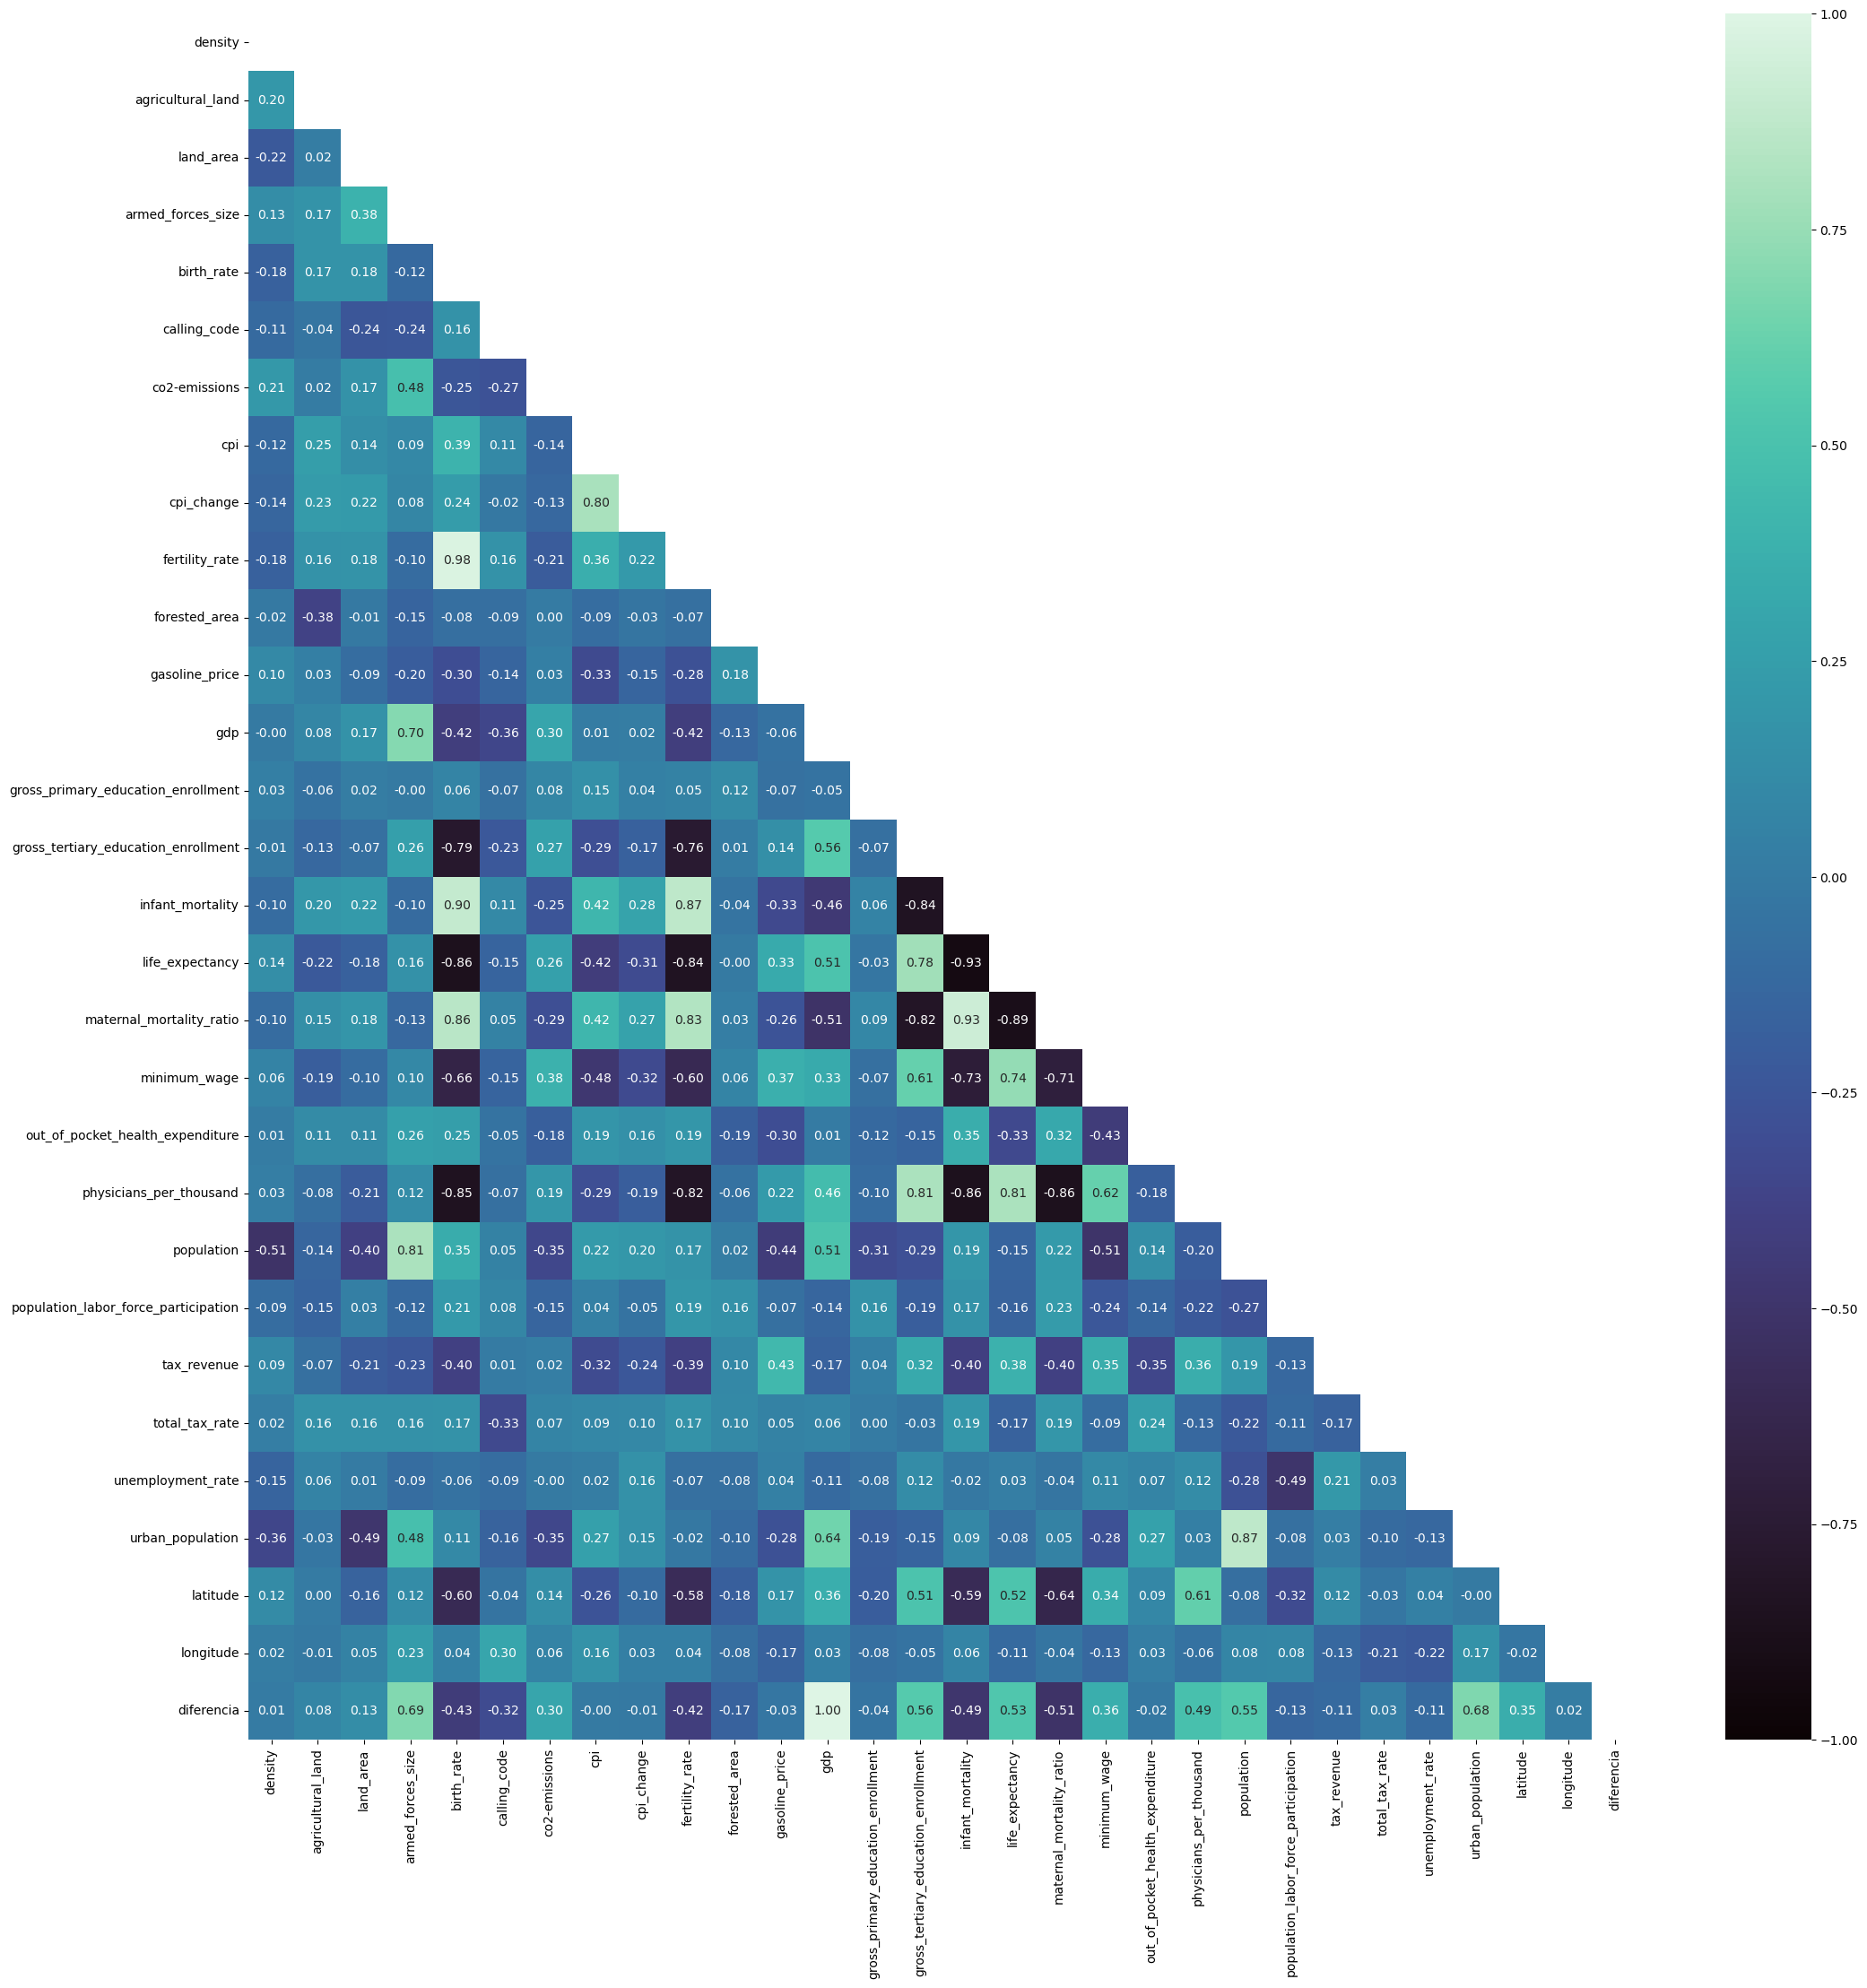

In [79]:
plt.figure(figsize = (25, 25))

mask = np.triu(np.ones_like(df_corr_3, dtype=bool))
sns.heatmap(df_corr_3, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1,
            mask=mask); # para identificar el valor mínimo de nuestra escala de colores

In [42]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent', 'infant_mortality_2'],
      dtype='object')